In [165]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [166]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [167]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [168]:
inspections['date'].head()

0    20140807
1    20140729
2    20140124
3    20140114
4    20141110
Name: date, dtype: int64

In [169]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [201]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
# frames = [businesses, inspections, violations]
# restaurant_scores = pd.concat(frames)
# restaurant_scores.head()

bus_inspect = pd.merge(businesses, inspections, on='business_id', how='outer')
restaurant_scores = pd.merge(bus_inspect, violations, on='business_id', how='outer')
restaurant_scores.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_city,owner_state,owner_zip,Score,date_x,type,date_y,ViolationTypeID,risk_category,description
0,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,20140114.0,103154.0,Low Risk,Unclean or degraded floors walls or ceilings
1,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,20140114.0,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,20140114.0,103145.0,Low Risk,Improper storage of equipment utensils or linens
3,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,20140729.0,103129.0,Moderate Risk,Insufficient hot water or running water
4,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,20140729.0,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils


In [171]:
# 2 Which ten business have had the most inspections?
restaurant_scores['name'].value_counts().head(10)

Yama Sushi Restaurant           736
Lers Ros Thai Noodle            685
Dol-Ho Restaurant               684
Dragon River Restaurant         646
Cafe Bakery                     621
RIVERSIDE SEAFOOD RESTAURANT    570
Peet's Coffee & Tea             561
Chez Fayala                     544
The Brick Yard                  504
Sunmoon Market, Inc.            480
Name: name, dtype: int64

In [172]:
# 3 Group and count the inspections by type
restaurant_scores.groupby(['type']).type.count()

type
Administrative or Document Review        49
Complaint                             18233
Complaint Reinspection/Followup        1698
Foodborne Illness Investigation        1037
Multi-agency Investigation               18
New Construction                       6190
New Ownership                          9175
Non-inspection site visit              7809
Reinspection/Followup                 68081
Routine - Scheduled                     245
Routine - Unscheduled                129650
Special Event                            16
Structural Inspection                   641
Name: type, dtype: int64

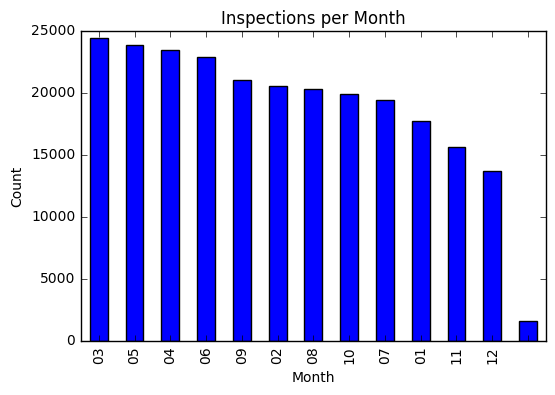

In [202]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
import matplotlib.pyplot as plt
%matplotlib inline

restaurant_scores['month'] = restaurant_scores['date_x'].map(lambda x: str(x)[4:6])
restaurant_scores['month'].value_counts()

restaurant_scores['month'].value_counts().plot(kind='bar', title='Inspections per Month')
plt.xlabel('Month')
plt.ylabel('Count')

In [203]:
# 5 Which zip code contains the most high risk violations?
# high_risk = restaurant_scores[restaurant_scores.type == 'Foodborne Illness Investigation']
high_risk = restaurant_scores[restaurant_scores.risk_category == 'High Risk']
high_risk['postal_code'].value_counts().head(1)

94133    3640
Name: postal_code, dtype: int64

In [204]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
baseline = restaurant_scores['risk_category'].value_counts()
new = restaurant_scores[restaurant_scores.type == 'New Ownership']['risk_category'].value_counts()

b_percent = baseline.map(lambda x: x/ (len(restaurant_scores['risk_category'].index) * 1.0))
n_percent = new.map(lambda x: x/ (new.sum() * 1.0))
print "Baseline: "
print b_percent
print "New Ownership: "
print n_percent
n_percent > b_percent

Baseline: 
Low Risk         0.504422
Moderate Risk    0.328468
High Risk        0.149953
Name: risk_category, dtype: float64
New Ownership: 
Low Risk         0.512491
Moderate Risk    0.341430
High Risk        0.146079
Name: risk_category, dtype: float64


Low Risk          True
Moderate Risk     True
High Risk        False
Name: risk_category, dtype: bool

In [ ]:
# 7 Examining the descriptions, what is the most common violation?


In [ ]:
# 8 Create a hist of the scores with 10 bins

In [ ]:
# 9 Can you predict risk category based on the other features in this dataset?

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [ ]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

In [ ]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

In [ ]:
# 2. Show the count of missing values in each column

In [ ]:
# 3. replace each null value in the dataframe with the string "Unknown"

In [ ]:
# 4. How many killings were there so far in 2015?

In [ ]:
# 5. Of all killings, how many were male and how many female?

In [ ]:
# 6. How many killings were of unarmed people?

In [ ]:
# 7. What percentage of all killings were unarmed?

In [ ]:
# 8. What are the 5 states with the most killings?

In [ ]:
# 9. Show a value counts of deaths for each race

In [ ]:
# 10. Display a histogram of ages of all killings

In [ ]:
# 11. Show 6 histograms of ages by race

In [ ]:
# 12. What is the average age of death by race?

In [ ]:
# 13. Show a bar chart with counts of deaths every month

In [ ]:
###################
### Less Morbid ###
###################

In [ ]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

In [ ]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

In [ ]:
# 2. Show the cout of missing values in each column

In [ ]:
# 3. What are the top 10 highest paying majors?

In [ ]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

In [ ]:
# 5. What is the average median salary for each major category?

In [ ]:
# 6. Show only the top 5 paying major categories

In [ ]:
# 7. Plot a histogram of the distribution of median salaries

In [ ]:
# 8. Plot a histogram of the distribution of median salaries by major category

In [ ]:
# 9. What are the top 10 most UNemployed majors?

In [ ]:
# What are the unemployment rates?

In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"